In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [3]:
data = pd.read_csv(r"C:\Users\moham\Downloads\diabetes.csv")
print(data.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [4]:
# Print the shape
print(data.shape)


(768, 9)


In [5]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
#data types
print(data.dtypes)



Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [7]:
print(data.describe())


       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [8]:
#extract the column names and nulls
cols = data.columns
data[cols].isnull().sum()



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
# dropping the dublicates
data=data.drop_duplicates()
print(data.to_string())

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6      148             72             35        0  33.6                     0.627   50        1
1              1       85             66             29        0  26.6                     0.351   31        0
2              8      183             64              0        0  23.3                     0.672   32        1
3              1       89             66             23       94  28.1                     0.167   21        0
4              0      137             40             35      168  43.1                     2.288   33        1
5              5      116             74              0        0  25.6                     0.201   30        0
6              3       78             50             32       88  31.0                     0.248   26        1
7             10      115              0              0        0  35.3                     0.134   29        0
8

In [10]:
# Print the shape after removing duplicated
print(data.shape)

(768, 9)


In [11]:
# checking for 0 values in 5 columns
print("Number of Zeros in Blood pressure is ",data[data['BloodPressure']==0].shape[0])
print("Number of Zeros in Glucose is ",data[data['Glucose']==0].shape[0])
print("Number of Zeros in SkinThickness is ",data[data['SkinThickness']==0].shape[0])
print("Number of Zeros in Insulin is ",data[data['Insulin']==0].shape[0])
print("Number of Zeros in BMI is ",data[data['BMI']==0].shape[0])



Number of Zeros in Blood pressure is  35
Number of Zeros in Glucose is  5
Number of Zeros in SkinThickness is  227
Number of Zeros in Insulin is  374
Number of Zeros in BMI is  11


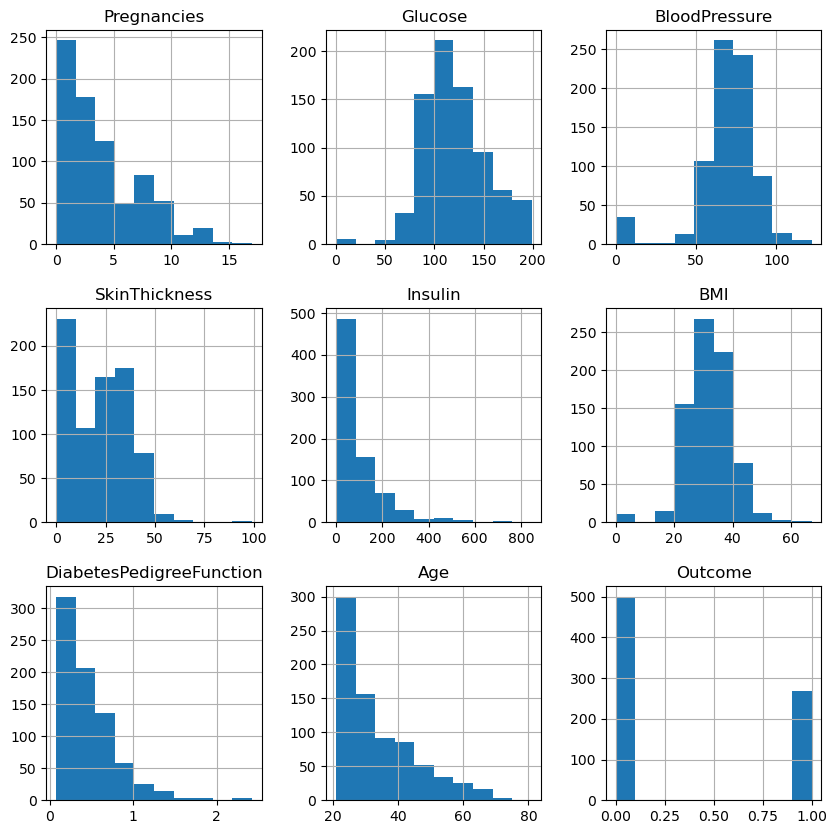

In [12]:
# graph for each column
# Create a figure with specified size
data.hist(bins=10,figsize=(10,10))
plt.show()


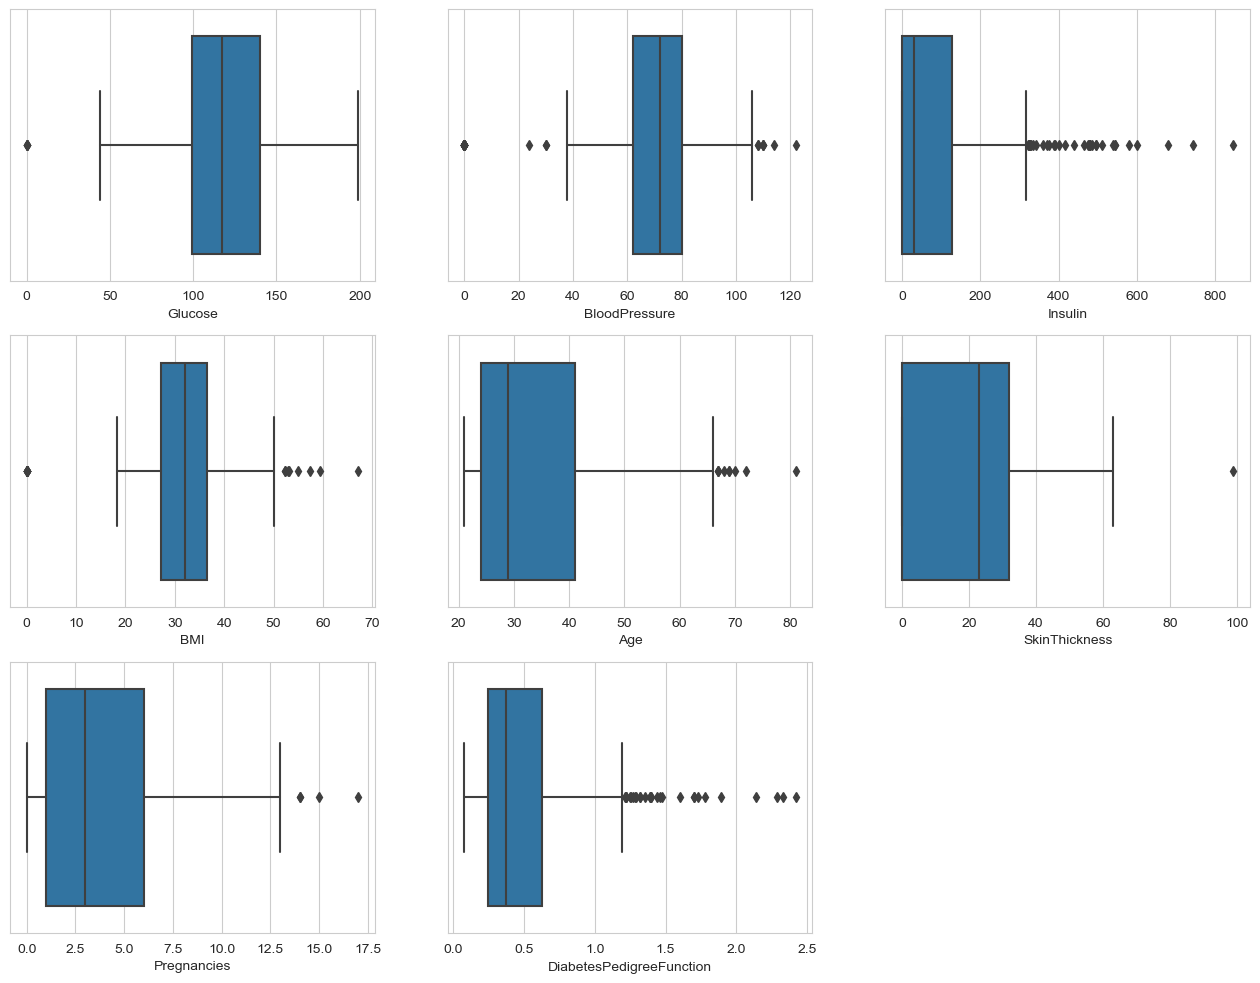

In [13]:
# visualization Before handling Outliers
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data)
plt.show()


In [14]:
# replace 0 values in columns of with the median or mean of that column,depending on the distribution of the data.
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean()) #normal distribution
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())# normal distribution
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].median()) # skewed distribution
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].median()) # skewed distribution
data['BMI'] = data['BMI'].replace(0,data['BMI'].median()) # skewed distribution
print(data.to_string())



     Pregnancies     Glucose  BloodPressure  SkinThickness  Insulin   BMI  DiabetesPedigreeFunction  Age  Outcome
0              6  148.000000      72.000000             35     30.5  33.6                     0.627   50        1
1              1   85.000000      66.000000             29     30.5  26.6                     0.351   31        0
2              8  183.000000      64.000000             23     30.5  23.3                     0.672   32        1
3              1   89.000000      66.000000             23     94.0  28.1                     0.167   21        0
4              0  137.000000      40.000000             35    168.0  43.1                     2.288   33        1
5              5  116.000000      74.000000             23     30.5  25.6                     0.201   30        0
6              3   78.000000      50.000000             32     88.0  31.0                     0.248   26        1
7             10  115.000000      69.105469             23     30.5  35.3               

In [15]:
# checking for 0 values in 5 columns after replacing
print("Number of Zeros in Blood pressure is ",data[data['BloodPressure']==0].shape[0])
print("Number of Zeros in Glucose is ",data[data['Glucose']==0].shape[0])
print("Number of Zeros in SkinThickness is ",data[data['SkinThickness']==0].shape[0])
print("Number of Zeros in Insulin is ",data[data['Insulin']==0].shape[0])
print("Number of Zeros in BMI is ",data[data['BMI']==0].shape[0])


Number of Zeros in Blood pressure is  0
Number of Zeros in Glucose is  0
Number of Zeros in SkinThickness is  0
Number of Zeros in Insulin is  0
Number of Zeros in BMI is  0


In [16]:
# The data in View of Outcome
print(data.groupby('Outcome').mean())
print(data['Outcome'].value_counts())


         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  110.705367      70.810008      26.058000   83.188000   
1           4.865672  142.159661      74.950326      29.716418  116.041045   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.880200                  0.429734  31.190000  
1        35.381343                  0.550500  37.067164  
Outcome
0    500
1    268
Name: count, dtype: int64


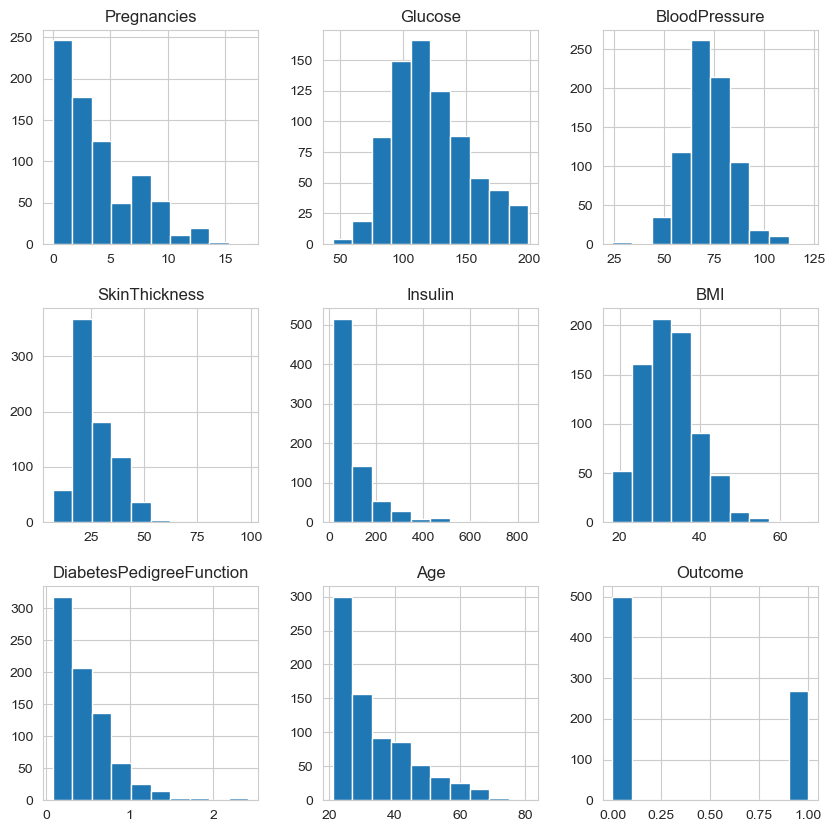

In [15]:
# graph for each column after cleaning
# Create a figure with specified size
data.hist(bins=10,figsize=(10,10))
plt.show()


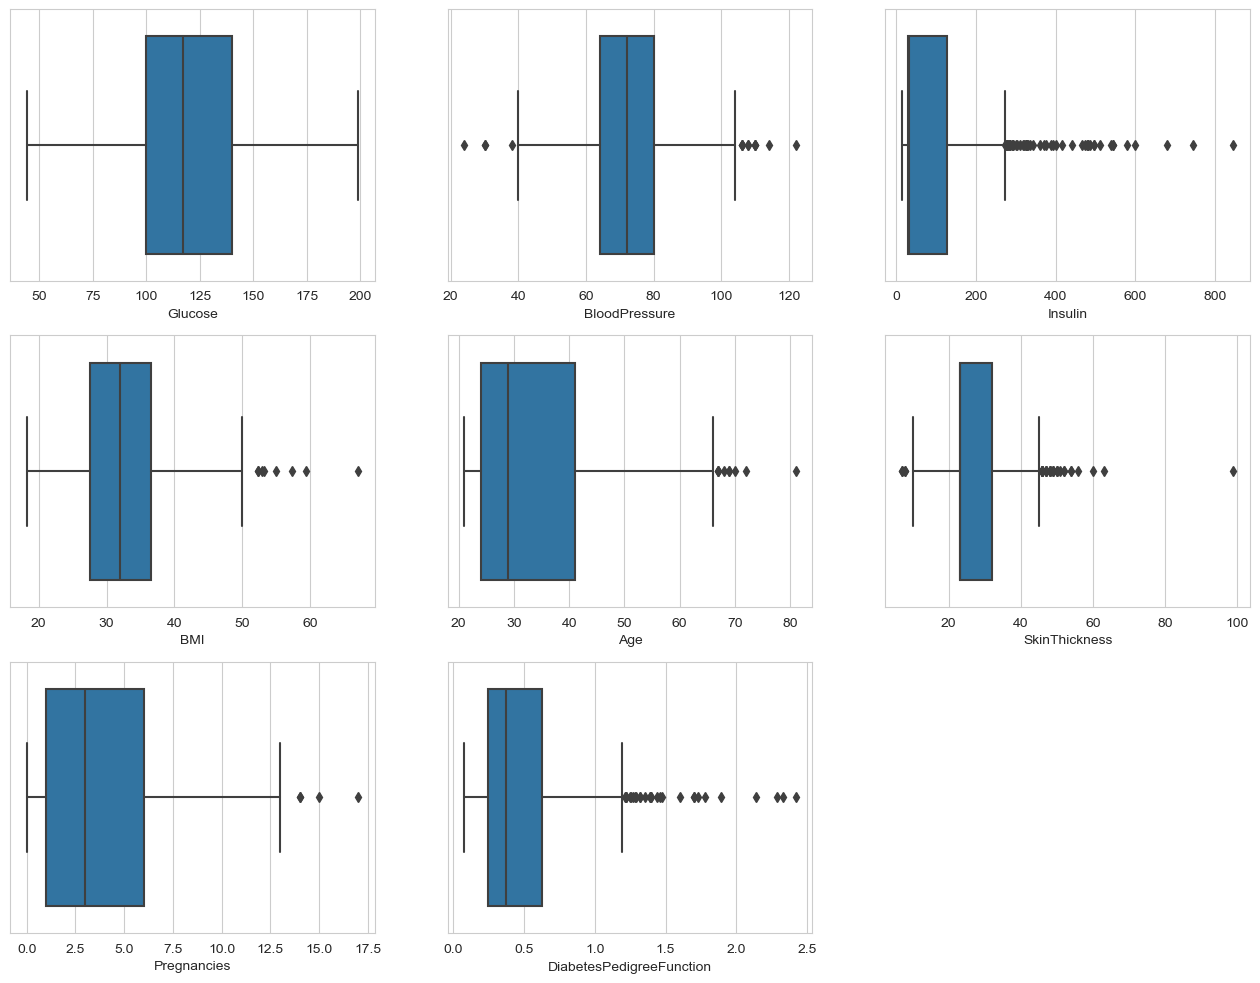

In [16]:
# visualization after handling Outliers
plt.figure(figsize=(16,12))
sns.set_style(style='whitegrid')
plt.subplot(3,3,1)
sns.boxplot(x='Glucose',data=data)
plt.subplot(3,3,2)
sns.boxplot(x='BloodPressure',data=data)
plt.subplot(3,3,3)
sns.boxplot(x='Insulin',data=data)
plt.subplot(3,3,4)
sns.boxplot(x='BMI',data=data)
plt.subplot(3,3,5)
sns.boxplot(x='Age',data=data)
plt.subplot(3,3,6)
sns.boxplot(x='SkinThickness',data=data)
plt.subplot(3,3,7)
sns.boxplot(x='Pregnancies',data=data)
plt.subplot(3,3,8)
sns.boxplot(x='DiabetesPedigreeFunction',data=data)
plt.show()

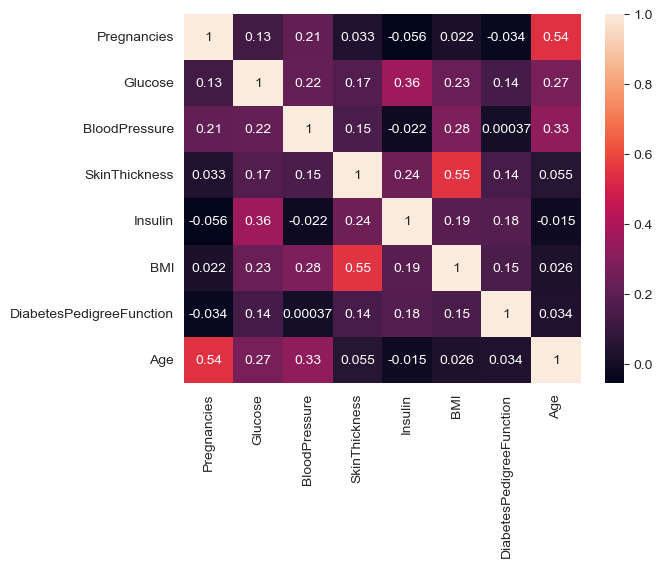

In [17]:
sns.heatmap(data.drop("Outcome", axis=1).corr(), annot=True);

<Axes: xlabel='Glucose', ylabel='Age'>

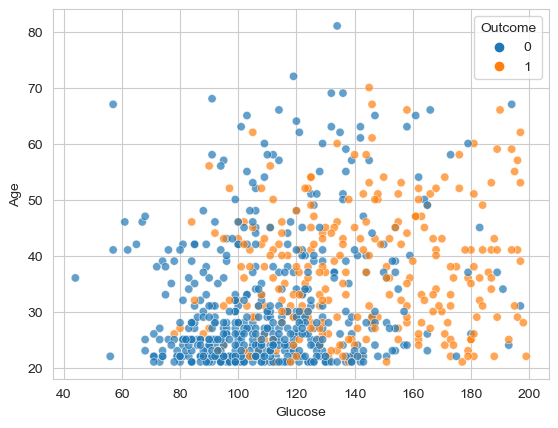

In [18]:
#scatter plot to show percentages for Age & Glucose
sns.scatterplot(data, y="Age", x="Glucose", hue="Outcome", alpha=0.7)

<Axes: xlabel='Pregnancies', ylabel='count'>

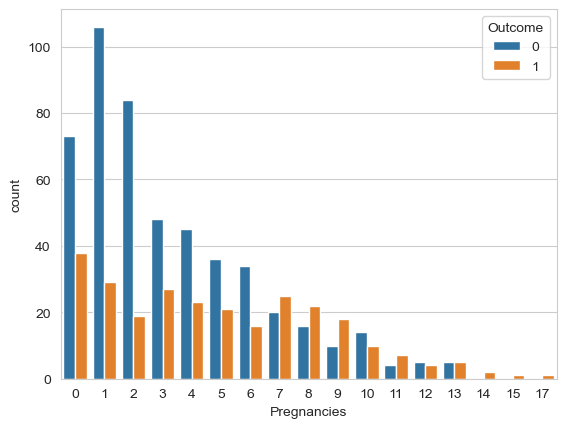

In [19]:
#count plot for number of pregnancies
sns.countplot(data, x="Pregnancies", hue="Outcome")

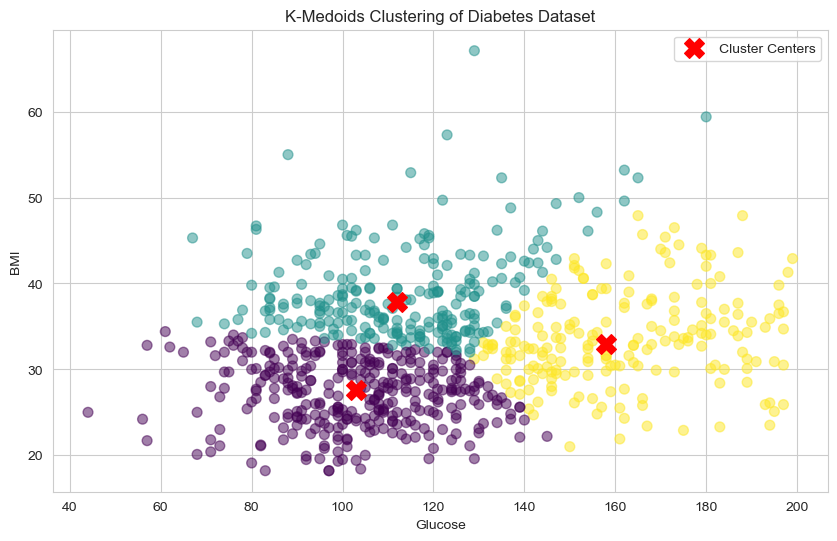

In [20]:
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import StandardScaler



# Selecting 'Glucose' and 'BMI' columns
X = data[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize KMedoids with number of clusters
kmedoids = KMedoids(n_clusters=3, random_state=42)

# Fit the model
kmedoids.fit(X_scaled)

# Get cluster labels and cluster centers
cluster_labels = kmedoids.labels_
cluster_centers = scaler.inverse_transform(kmedoids.cluster_centers_)

# Plotting the clusters
plt.figure(figsize=(10, 6))

# Plotting the points
plt.scatter(X['Glucose'], X['BMI'], c=cluster_labels, cmap='viridis', s=50, alpha=0.5)

# Plotting the cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='X', s=200, label='Cluster Centers')

plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('K-Medoids Clustering of Diabetes Dataset')
plt.legend()
plt.grid(True)
plt.show()


In [21]:
# Print cluster centers
print("Cluster Centers:")
print(cluster_centers)

# Print cluster labels
print("\nCluster Labels:")
print(cluster_labels)


Cluster Centers:
[[103.   27.6]
 [112.   37.8]
 [158.   32.9]]

Cluster Labels:
[2 0 2 0 1 0 0 1 2 1 1 2 2 2 2 0 1 0 1 1 1 1 2 0 2 0 2 0 0 1 1 2 0 0 0 0 2
 0 1 1 2 1 0 2 2 2 2 0 1 0 0 0 0 2 2 0 2 1 2 1 0 2 0 2 1 0 0 1 0 2 0 2 1 1
 0 0 0 1 1 0 0 0 0 0 1 0 1 1 1 0 0 0 1 0 2 2 0 0 0 1 2 2 0 0 1 0 0 2 1 1 2
 2 0 0 2 2 1 0 0 0 1 1 1 0 1 1 1 1 1 0 2 1 2 1 0 1 0 0 2 1 0 1 0 0 2 0 0 0
 2 0 1 0 2 2 2 1 0 0 0 2 2 1 1 0 2 0 2 0 0 0 0 1 0 1 0 2 0 1 1 1 0 1 0 0 2
 2 2 1 0 2 0 1 2 1 0 2 0 0 1 2 0 1 0 0 1 0 2 2 0 2 0 1 2 1 1 2 1 0 0 1 2 2
 0 2 0 1 1 2 2 1 1 1 0 1 0 2 2 2 2 0 0 0 0 0 2 2 0 1 1 0 0 0 0 1 0 1 0 0 2
 2 2 2 0 2 0 1 2 1 0 2 1 0 0 0 1 1 0 0 0 0 2 1 2 2 0 0 2 1 0 1 1 1 1 1 2 2
 2 0 1 0 2 2 1 1 2 1 2 0 0 1 0 1 2 0 1 1 0 2 1 2 0 0 0 2 1 2 1 2 1 0 0 0 2
 0 0 2 1 0 2 2 0 0 0 1 1 1 2 0 0 1 1 2 0 0 1 2 1 1 1 2 2 2 1 2 2 1 0 0 0 2
 2 0 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 1 2 0 0 2 0 0 2 0 0 1 0 2 0 0 2 0 2 1 0
 0 2 2 1 1 1 2 2 2 0 2 0 0 1 0 1 0 2 2 0 2 1 1 0 0 0 0 0 1 2 2 0 1 2 0 1 0
 0 1 0 1 1 0 0 2 1 0

In [22]:
# Print points of each center (medoid)
for i in range(len(cluster_centers)):
    medoid_index = np.where(cluster_labels == i)[0][0]
    print(f"Cluster {i+1} (Medoid): {X.iloc[medoid_index]}")


Cluster 1 (Medoid): Glucose    85.0
BMI        26.6
Name: 1, dtype: float64
Cluster 2 (Medoid): Glucose    137.0
BMI         43.1
Name: 4, dtype: float64
Cluster 3 (Medoid): Glucose    148.0
BMI         33.6
Name: 0, dtype: float64


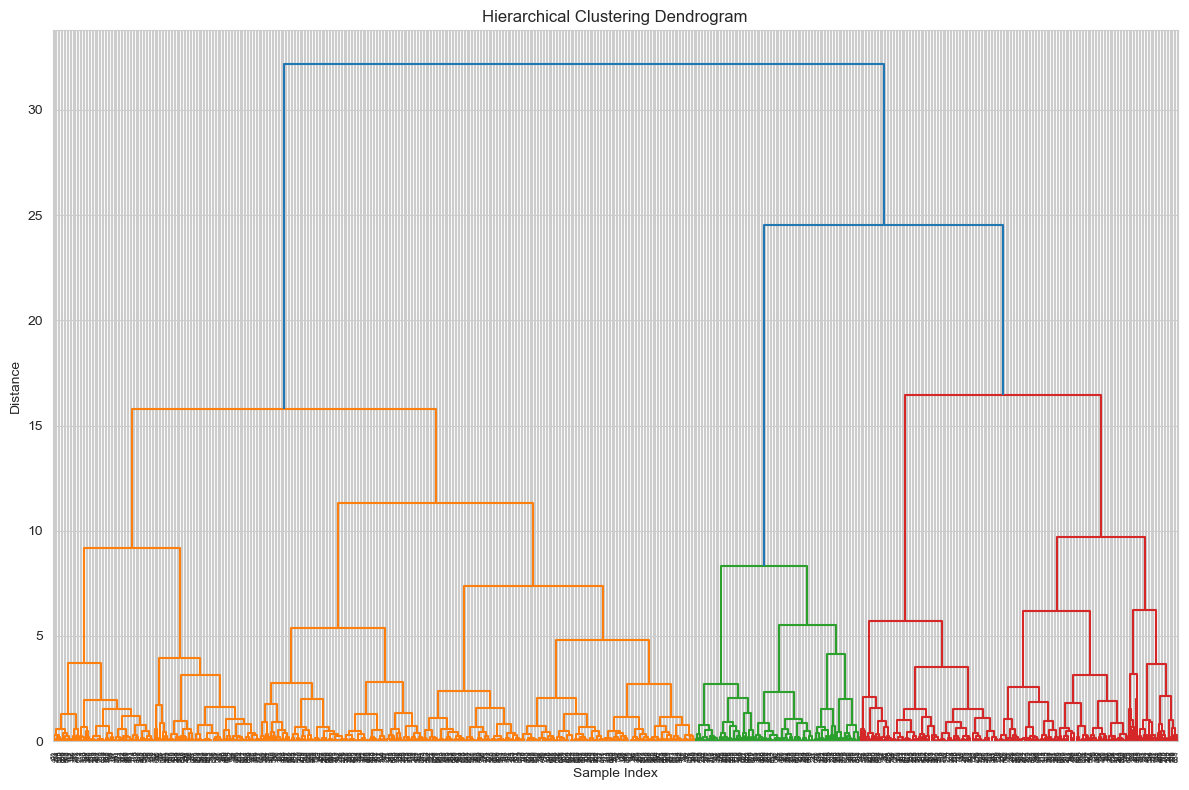

In [23]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage



# Selecting 'Glucose' and 'BMI' columns
X = data[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Initialize AgglomerativeClustering with number of clusters
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the model
agglomerative.fit(X_scaled)

# Calculate the linkage matrix
linkage_matrix = linkage(X_scaled, method='ward')

plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(linkage_matrix, orientation='top', labels=np.arange(len(X)))
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


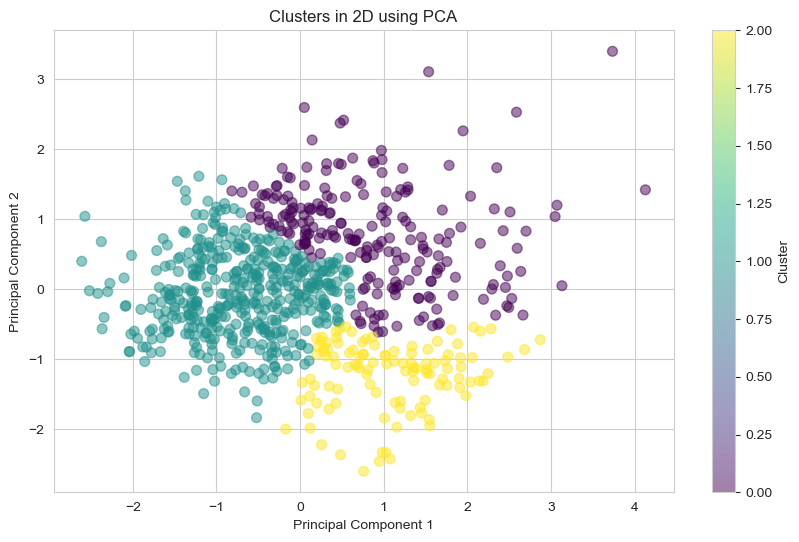

In [24]:
# Importing necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA


# Selecting 'Glucose' and 'BMI' columns
X = data[['Glucose', 'BMI']]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA for dimensionality reduction to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Initialize AgglomerativeClustering with number of clusters
agglomerative = AgglomerativeClustering(n_clusters=3)

# Fit the model
agglomerative.fit(X_scaled)

# Plot the clustered data in 2D
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=agglomerative.labels_, cmap='viridis', s=50, alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clusters in 2D using PCA')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()
